<a href="https://colab.research.google.com/github/JaeDoo1034/Kaggle-Study/blob/master/NIpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tarfile

In [3]:
path = '/content/drive/My Drive/'

In [ ]:
ap = tarfile.open(path + 'NIPA_하반기 경진대회_사전검증.tar')

In [ ]:
ap.extractall(path + 'Input')

In [8]:
train_dir = path + 'Input/train'
test_dir = path + 'Input/test'

In [4]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, concatenate, Input
from tensorflow.keras import Model
import os

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from PIL import Image # 이미지를 열 때 사용

In [9]:
train_dir

'/content/drive/My Drive/Input/train'

In [10]:
os.listdir(train_dir)

['4_11_829.jpg',
 '11_14_541.jpg',
 '13_15_806.jpg',
 '13_1_169.jpg',
 '13_18_1978.jpg',
 '13_17_1235.jpg',
 '11_14_554.jpg',
 '7_20_1000.jpg',
 '13_1_2042.jpg',
 '5_8_1593.jpg',
 '13_1_1894.jpg',
 '3_20_163.jpg',
 '10_20_2591.jpg',
 '13_15_956.jpg',
 '3_5_895.jpg',
 '4_11_932.jpg',
 '8_9_390.jpg',
 '13_18_1689.jpg',
 '3_20_979.jpg',
 '7_1_49.jpg',
 '11_14_534.jpg',
 '3_20_160.jpg',
 '7_20_440.jpg',
 '13_17_244.jpg',
 '8_6_900.jpg',
 '8_9_973.jpg',
 '7_1_47.jpg',
 '13_6_819.jpg',
 '13_6_616.jpg',
 '8_6_230.jpg',
 '5_8_3319.jpg',
 '13_15_1441.jpg',
 '13_9_250.jpg',
 '13_17_455.jpg',
 '10_20_2745.jpg',
 '13_18_1356.jpg',
 '10_20_3713.jpg',
 '13_1_1976.jpg',
 '13_18_1018.jpg',
 '8_9_998.jpg',
 '3_20_970.jpg',
 '13_20_293.jpg',
 '4_11_296.jpg',
 '7_1_46.jpg',
 '13_18_4926.jpg',
 '5_8_2143.jpg',
 '13_15_1350.jpg',
 '3_5_489.jpg',
 '7_20_1148.jpg',
 '13_16_341.jpg',
 '4_2_396.jpg',
 '13_6_191.jpg',
 '4_7_1161.jpg',
 '8_6_58.jpg',
 '10_20_2428.jpg',
 '13_20_878.jpg',
 '13_1_1846.jpg',
 '4_2_5

In [11]:
train_files = glob.glob(train_dir + '/*jpg')
len(train_files)

16000

In [12]:
train_files[1500]

'/content/drive/My Drive/Input/train/4_7_362.jpg'

이미지 사이즈 알기

In [13]:
img_1 = Image.open(train_files[0])

In [14]:
image = np.array(img_1)

In [15]:
image.shape

(256, 256, 3)

In [16]:
train_files[0]

'/content/drive/My Drive/Input/train/4_11_829.jpg'

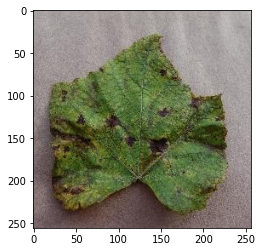

In [17]:
plt.imshow(image)
plt.show()

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
train_dir

'/content/drive/My Drive/Input/train'

In [21]:
train_files

['/content/drive/My Drive/Input/train/4_11_829.jpg',
 '/content/drive/My Drive/Input/train/11_14_541.jpg',
 '/content/drive/My Drive/Input/train/13_15_806.jpg',
 '/content/drive/My Drive/Input/train/13_1_169.jpg',
 '/content/drive/My Drive/Input/train/13_18_1978.jpg',
 '/content/drive/My Drive/Input/train/13_17_1235.jpg',
 '/content/drive/My Drive/Input/train/11_14_554.jpg',
 '/content/drive/My Drive/Input/train/7_20_1000.jpg',
 '/content/drive/My Drive/Input/train/13_1_2042.jpg',
 '/content/drive/My Drive/Input/train/5_8_1593.jpg',
 '/content/drive/My Drive/Input/train/13_1_1894.jpg',
 '/content/drive/My Drive/Input/train/3_20_163.jpg',
 '/content/drive/My Drive/Input/train/10_20_2591.jpg',
 '/content/drive/My Drive/Input/train/13_15_956.jpg',
 '/content/drive/My Drive/Input/train/3_5_895.jpg',
 '/content/drive/My Drive/Input/train/4_11_932.jpg',
 '/content/drive/My Drive/Input/train/8_9_390.jpg',
 '/content/drive/My Drive/Input/train/13_18_1689.jpg',
 '/content/drive/My Drive/Input/t

In [22]:
def read_image(path):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile,dtype = tf.float64)
  return image

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [24]:
dataset = tf.data.Dataset.from_tensor_slices(train_files)

In [25]:
dataset = dataset.map(read_image,num_parallel_calls=AUTOTUNE)

In [26]:
tf_image = next(iter(dataset))

In [27]:
tf_image.shape

TensorShape([256, 256, 3])

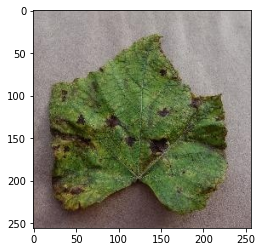

In [28]:
plt.imshow(tf_image)
plt.show()

In [29]:
os.path.basename(train_files[0]).replace('jpg','').split('_')

['4', '11', '829.']

In [30]:
def get_plant(path):
  return os.path.basename(path).replace('jpg','').split('_')[0]

In [31]:
def get_disease(path):
  return os.path.basename(path).replace('jpg','').split('_')[1]

In [32]:
def get_index(path):
  return os.path.basename(path).replace('jpg','').split('_')[2]

In [33]:
plant_label = [get_plant(path) for path in train_files]

In [34]:
plant_disease = [get_disease(path) for path in train_files]

In [35]:
plant_index = [get_index(path) for path in train_files]

In [36]:
print(len(plant_label))
print(len(plant_disease))
print(len(plant_index))

16000
16000
16000


In [37]:
unique_plant_label = np.unique(plant_label,return_counts = True)
unique_disease_label = np.unique(plant_disease,return_counts = True)

In [38]:
unique_plant_label

(array(['10', '11', '13', '3', '4', '5', '7', '8'], dtype='<U2'),
 array([ 800,  800, 6400, 1600, 2400,  800, 1600, 1600]))

In [39]:
unique_disease_label

(array(['1', '11', '14', '15', '16', '17', '18', '2', '20', '5', '6', '7',
        '8', '9'], dtype='<U2'),
 array([1600,  800,  800,  800,  800,  800,  800,  800, 3200,  800, 1600,
         800,  800, 1600]))

In [40]:
data = {'path' : train_files,'plant' : plant_label, 'disease' : plant_disease,'index' : plant_index}

In [41]:
df = pd.DataFrame(data)

In [42]:
df['index'] = df['index'].str.replace('.','')

In [43]:
df = df.set_index('index')

In [44]:
df = df.reset_index()

In [45]:
val_df = df.sample(2000)

In [46]:
val_df

,index,path,plant,disease
6843,845,/content/drive/My Drive/Input/train/13_6_845.jpg,13,6
8173,686,/content/drive/My Drive/Input/train/13_20_686.jpg,13,20
6292,967,/content/drive/My Drive/Input/train/8_6_967.jpg,8,6
7329,771,/content/drive/My Drive/Input/train/3_5_771.jpg,3,5
1744,275,/content/drive/My Drive/Input/train/4_2_275.jpg,4,2
...,...,...,...,...
7537,2716,/content/drive/My Drive/Input/train/10_20_2716...,10,20
7953,534,/content/drive/My Drive/Input/train/4_2_534.jpg,4,2
6468,379,/content/drive/My Drive/Input/train/13_17_379.jpg,13,17
9540,3241,/content/drive/My Drive/Input/train/5_8_3241.jpg,5,8


In [47]:
val_index = np.array(val_df.index)

In [48]:
total_index = np.array(df.index )

In [49]:
train_index = np.setdiff1d(total_index, val_index)

In [50]:
train_df = df.loc[train_index]

In [51]:
train_datagen = ImageDataGenerator(
        rescale=1./255)

In [52]:
train_generator_plant = train_datagen.flow_from_dataframe(
        train_df,
        x_col='path',
        y_col='plant',
        target_size=(256,256),
        batch_size=40
)

valid_generator_plant = train_datagen.flow_from_dataframe(
        val_df,
        x_col='path',
        y_col='plant',
        target_size=(256,256),
        batch_size=40
)

Found 14000 validated image filenames belonging to 8 classes.
Found 2000 validated image filenames belonging to 8 classes.


In [53]:
train_generator_disease = train_datagen.flow_from_dataframe(
        train_df,
        x_col='path',
        y_col='disease',
        target_size=(256,256),
        batch_size=40
)

valid_generator_disease = train_datagen.flow_from_dataframe(
        val_df,
        x_col='path',
        y_col='disease',
        target_size=(256,256),
        batch_size=40
)

Found 14000 validated image filenames belonging to 14 classes.
Found 2000 validated image filenames belonging to 14 classes.


In [54]:
input_shape = (256,256,3)
dropout_rate = 0.3
num_class_plant = 8
num_class_disease = 14

In [70]:
# 다중 출력을 위해 구조 짜는 중.. AutoEncoder만들까 고민중
inputs = tf.keras.layers.Input(input_shape)
net = tf.keras.layers.Conv2D(64, (3, 3), padding='SAME',activation  ='relu')(inputs)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Conv2D(62, (3, 3), padding='SAME',activation  = 'relu')(net)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Flatten()(net)
net = tf.keras.layers.Dense(64,activation = 'relu')(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)
net = tf.keras.layers.Dense(num_class_plant,activation = 'softmax')(net)

model_plant = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [71]:
inputs = tf.keras.layers.Input(input_shape)
net = tf.keras.layers.Conv2D(64, (3, 3), padding='SAME',activation  ='relu')(inputs)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Conv2D(62, (3, 3), padding='SAME',activation  = 'relu')(net)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Flatten()(net)
net = tf.keras.layers.Dense(64,activation = 'relu')(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)
net = tf.keras.layers.Dense(num_class_disease,activation = 'softmax')(net)

model_disease = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler

In [58]:
train_files[0]

'/content/drive/My Drive/Input/train/4_11_829.jpg'

In [72]:
# 그냥 파일 하나로 쓰자 - 수정 예정
checkpoint_path_plant = '/content/drive/My Drive/Input/model0.hdf5' 
checkpoint_path_disease = '/content/drive/My Drive/Input/model1.hdf5'

In [73]:
cb_check_plant = ModelCheckpoint(checkpoint_path_plant,monitor='val_loss',verbose = 1,save_best_only = True,save_weights_only = True, mode ='auto')
reduce_lr_loss_plant = ReduceLROnPlateau(monitor= 'val_loss',factor = 0.2,min_lr = 1e-7,verbose = 1, mode = 'auto')
early_plant = EarlyStopping(monitor = 'val_loss',mode = 'min',restore_best_weights=True, patience = 5, verbose = 1)

In [74]:
cb_check_disease = ModelCheckpoint(checkpoint_path_disease,monitor='val_loss',verbose = 1,save_best_only = True,save_weights_only = True, mode ='auto')
reduce_lr_loss_disease = ReduceLROnPlateau(monitor= 'val_loss',factor = 0.2,min_lr = 1e-7,verbose = 1, mode = 'auto')
early_disease = EarlyStopping(monitor = 'val_loss',mode = 'min',restore_best_weights=True, patience = 5, verbose = 1)

In [75]:
model_plant.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=[recall_m,precision_m,f1_m])

In [76]:
model_disease.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=[recall_m,precision_m,f1_m])

In [77]:
# 참고 : https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [68]:
!pip install tensor-dash

In [69]:
from tensordash.tensordash import Tensordash

In [80]:
history_plant = model_plant.fit_generator(
        train_generator_plant,
        # steps_per_epoch=40,
        epochs=30,
        validation_data=valid_generator_plant,
        #validation_steps=40,
        callbacks = [reduce_lr_loss_plant,cb_check_plant,early_plant]
        )

Epoch 1/30
  3/350 [..............................] - ETA: 25:06 - loss: 1.7557 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00

KeyboardInterrupt: ignored

In [79]:
history_plant = Tensordash(
    ModelName = 'Plant',
    email = 'hoduo03@naver.com',
    password = 'woen1034!@'


)


try : 
  model_plant.fit_generator(
        train_generator_plant,
        # steps_per_epoch=40,
        epochs=30,
        validation_data=valid_generator_plant,
        #validation_steps=40,
        callbacks = [reduce_lr_loss_plant,cb_check_plant,early_plant,history_plant]
        )
  
except:
  history.sendCrash()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
 18/350 [>.............................] - ETA: 45:35 - loss: 4.1047 - recall_m: 0.1306 - precision_m: 0.2189 - f1_m: 0.1539

NameError: ignored

In [ ]:
history_disease = Tensordash(
    ModelName = 'Plant',
    email = 'hoduo03@naver.com',
    password = 'woen1034!@'


)


try : 
  model_disease.fit_generator(
        train_generator_plant,
        # steps_per_epoch=40,
        epochs=30,
        validation_data=valid_generator_plant,
        #validation_steps=40,
        callbacks = [reduce_lr_loss_plant,cb_check_plant,early_plant,history_disease]
        )
  
except:
  history_disease.sendCrash()